# Traffic Forecasting with Pytorch Geometric Temporal


## Installation

In [1]:
import torch
from IPython.display import clear_output
pt_version = torch.__version__
print(pt_version)

2.0.1


This took some time for me, so be patient :)

In [2]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-geometric
!pip install torch-geometric-temporal
clear_output()

In [1]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcpu/pyg_lib-0.2.0%2Bpt20-cp39-cp39-macosx_10_15_x86_64.whl (727 kB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcpu/torch_scatter-2.1.1-cp39-cp39-macosx_10_15_x86_64.whl (348 kB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcpu/torch_sparse-0.6.17-cp39-cp39-macosx_10_15_x86_64.whl (618 kB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcpu/torch_cluster-1.6.1-cp39-cp39-macosx_10_15_x86_64.whl (306 kB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcpu/torch_spline_conv-1.2.2-cp39-cp39-macosx_10_15_x86_64.whl (107 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 16.8 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/javier/Desktop/TFM/MT_predicting_BSD/modelling/pytorch_geometrical/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install torch-geometric-temporal

  Using cached torch_geometric_temporal-0.54.0.tar.gz (48 kB)
  Preparing metadata (setup.py) ... done
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 MB 12.8 MB/s eta 0:00:0000:0100:01
  Using cached Cython-0.29.35-py2.py3-none-any.whl (988 kB)
  Using cached torch_geometric-2.3.1.tar.gz (661 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 20.6 MB/s eta 0:00:0000:0100:01
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached urllib3-2.0.3-py3-none-any.whl (123 kB)
     ━━━━━━━━━━━━━━━━━━━━━

In [10]:
!pip install --no-cache-dir pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2301 lines of output]
      <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      /private/var/folders/yw/h9ndkfbx6_lb6gwchxbgts2m0000gn/T/pip-build-env-iqrwj5zv/overlay/lib/python3.11/site-packages/setuptools/config/setupcfg.py:293: _DeprecatedConfig: Deprecated config in `setup.cfg`
      !!
      
              ********************************************************************************
              The license_file parameter is deprecated, use license_files instead.
      
              By 2023-Oct-30, you need to update your project and re

In [12]:
!pip install pandas-1.3.5-cp39-cp39-macosx_10_9_x86_64.whl

ERROR: pandas-1.3.5-cp39-cp39-macosx_10_9_x86_64.whl is not a supported wheel on this platform.


## Dataset
- Traffic forecasting dataset based on Los Angeles Metropolitan traffic
- 207 loop detectors on highways
- March 2012 - June 2012
- From the paper: Diffusion Convolutional Recurrent Neural Network


In [2]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader
from torch_geometric_temporal.signal import StaticGraphTemporalSignal


In [32]:
import os
X = np.load(os.path.join("data_bicimad", "node_values.npy"))
X

array([[[3., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [3., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [2., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [2., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [2., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

In [33]:
X = X.transpose((1, 2, 0))
X

array([[[3., 0., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 2., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 1., ..., 2., 3., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [34]:
means = np.mean(X, axis=(0, 2))
X = X - means.reshape(1, -1, 1)
stds = np.std(X, axis=(0, 2))
stds[stds == 0] = 1
X = X / stds.reshape(1, -1, 1)
X

array([[[ 0.28330512, -0.68324041, -0.68324041, ..., -0.36105856,
         -0.36105856, -0.36105856],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.22765184, -0.22765184, -0.22765184, ..., -0.22765184,
         -0.22765184, -0.22765184],
        ...,
        [-0.10566764, -0.10566764, -0.10566764, ..., -0.10566764,
         -0.10566764, -0.10566764],
        [-4.9113639 , -4.9113639 , -4.9113639 , ..., -4.9113639 ,
         -4.9113639 , -4.9113639 ],
        [-0.17444686, -0.17444686, -0.17444686, ..., -0.17444686,
         -0.17444686, -0.17444686]],

       [[-0.68324041, -0.68324041, -0.03887672, ..., -0.68324041,
         -0.68324041, -0.68324041],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.22765184, -0.22765184, -0.22765184, ..., -0.22765184,
         -0.22765184, -0.22765184],
        ...,
        [-0.10566764, -0.10566764, -0.10566764, ..., -

In [37]:
import os
import zipfile
import numpy as np
import torch
from torch_geometric.utils import dense_to_sparse
from six.moves import urllib

class BICIMADloader(object):
    """A traffic forecasting dataset based on Los Angeles
    Metropolitan traffic conditions. The dataset contains traffic
    readings collected from 207 loop detectors on highways in Los Angeles
    County in aggregated 5 minute intervals for 4 months between March 2012
    to June 2012.

    For further details on the version of the sensor network and
    discretization see: `"Diffusion Convolutional Recurrent Neural Network:
    Data-Driven Traffic Forecasting" <https://arxiv.org/abs/1707.01926>`_
    """

    def __init__(self, raw_data_dir):
        self.raw_data_dir = raw_data_dir
        self._load_data()

    
    def _load_data(self):

        A = np.load(os.path.join(self.raw_data_dir, "adj_mat.npy"))
        X = np.load(os.path.join(self.raw_data_dir, "node_values.npy")).transpose(
            (1, 2, 0)
        )
        X = X.astype(np.float32)

        # Normalise as in DCRNN paper (via Z-Score Method)
        means = np.mean(X, axis=(0, 2))
        X = X - means.reshape(1, -1, 1)
        #TODO APAÑO!!!
        stds = np.std(X, axis=(0, 2))
        stds[stds == 0] = 1
        X = X / stds.reshape(1, -1, 1)

        self.A = torch.from_numpy(A)
        self.X = torch.from_numpy(X)

    def _get_edges_and_weights(self):
        edge_indices, values = dense_to_sparse(self.A)
        edge_indices = edge_indices.numpy()
        values = values.numpy()
        self.edges = edge_indices
        self.edge_weights = values

    def _generate_task(self, num_timesteps_in: int = 12, num_timesteps_out: int = 12):
        """Uses the node features of the graph and generates a feature/target
        relationship of the shape
        (num_nodes, num_node_features, num_timesteps_in) -> (num_nodes, num_timesteps_out)
        predicting the average traffic speed using num_timesteps_in to predict the
        traffic conditions in the next num_timesteps_out

        Args:
            num_timesteps_in (int): number of timesteps the sequence model sees
            num_timesteps_out (int): number of timesteps the sequence model has to predict
        """
        indices = [
            (i, i + (num_timesteps_in + num_timesteps_out))
            for i in range(self.X.shape[2] - (num_timesteps_in + num_timesteps_out) + 1)
        ]

        # Generate observations
        features, target = [], []
        for i, j in indices:
            features.append((self.X[:, :, i : i + num_timesteps_in]).numpy())
            target.append((self.X[:, 0, i + num_timesteps_in : j]).numpy())

        self.features = features
        self.targets = target

    def get_dataset(
        self, num_timesteps_in: int = 12, num_timesteps_out: int = 12
    ) -> StaticGraphTemporalSignal:
        """Returns data iterator for METR-LA dataset as an instance of the
        static graph temporal signal class.

        Return types:
            * **dataset** *(StaticGraphTemporalSignal)* - The METR-LA traffic
                forecasting dataset.
        """
        self._get_edges_and_weights()
        self._generate_task(num_timesteps_in, num_timesteps_out)
        dataset = StaticGraphTemporalSignal(
            self.edges, self.edge_weights, self.features, self.targets
        )

        return dataset


In [38]:

loader = BICIMADloader(raw_data_dir="data_bicimad")
dataset = loader.get_dataset(num_timesteps_in=168, num_timesteps_out=168)

In [11]:
print("Dataset type:  ", dataset)


Dataset type:   <torch_geometric_temporal.signal.static_graph_temporal_signal.StaticGraphTemporalSignal object at 0x7fbb1117b760>


In [12]:
print(len(set(dataset)))

TypeError: unhashable type: 'Data'

#### Data Sample
- 207 nodes
- 2 features per node (speed, time)
- 12 timesteps per bucket (12 x 5 min = 60 min)
- Labels for 12 future timesteps (normalized speed) --> node regression
- Edge_attr is build based on the distances between sensors + threshold
- Further details: https://pytorch-geometric-temporal.readthedocs.io/en/latest/_modules/torch_geometric_temporal/dataset/metr_la.html#METRLADatasetLoader
- Raw data: https://graphmining.ai/temporal_datasets/METR-LA.zip

In [5]:
# Show first sample
next(iter(dataset))

Data(x=[170, 22, 168], edge_index=[2, 28706], edge_attr=[28706], y=[170, 168])

In [6]:
# Important: It is not always like that!
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
d = ChickenpoxDatasetLoader().get_dataset(lags=4)
next(iter(d))

Data(x=[20, 4], edge_index=[2, 102], edge_attr=[102], y=[20])

You can always have a look at the source-code to see how a dataset is constructed. Chickenpox would be a classical "predict-next-timestep" dataset (the label is one step later than the features).
METR-LA would be a sequence-to-sequence prediction dataset that predicts further into the future than just the next timestep. You can also see, that the features are used as label as well.



```
# >>> From the ChickenpoxDatasetLoader <<<
self.features = [
            stacked_target[i : i + self.lags, :].T
            for i in range(stacked_target.shape[0] - self.lags)
        ]
self.targets = [
            stacked_target[i + self.lags, :].T
            for i in range(stacked_target.shape[0] - self.lags)
        ]

# >>> From METRLADatasetLoader <<<
indices = [
            (i, i + (num_timesteps_in + num_timesteps_out))
            for i in range(self.X.shape[2] - (num_timesteps_in + num_timesteps_out) + 1)
        ]
for i, j in indices:
            features.append((self.X[:, :, i : i + num_timesteps_in]).numpy())
            target.append((self.X[:, 0, i + num_timesteps_in : j]).numpy())
```



<Axes: >

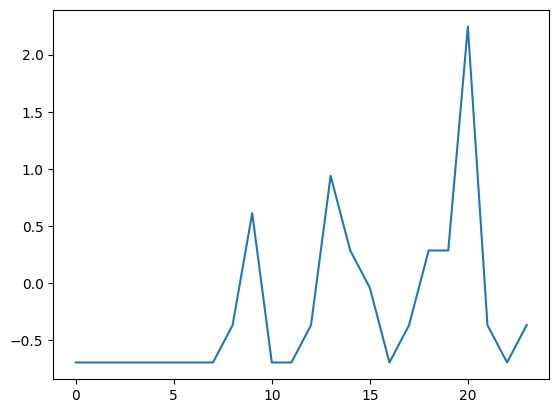

In [14]:
import seaborn as sns
# Visualize traffic over time
sensor_number = 1
hours = 24
sensor_labels = [bucket.y[sensor_number][0].item() for bucket in list(dataset)[:hours]]
sns.lineplot(data=sensor_labels)

#### Test Train Split

In [39]:
from torch_geometric_temporal.signal import temporal_signal_split
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

#print("Number of train buckets: ", len(set(train_dataset)))
#print("Number of test buckets: ", len(set(test_dataset)))

## Model

Which model to choose depends on which time-series task you work on.

- A3TGCN is an extension of TGCN that uses attention
- The spatial aggregation uses GCN, the temporal aggregation a GRU
- We can pass in periods to get an embedding for several timesteps
- This embedding can be used to predict several steps into the future = output dimension
- We could also do this in a loop and feed it again into the model (would be autoregressive)
- There is only one block here. Other layers also allow stacking???

In [40]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import A3TGCN

class TemporalGNN(torch.nn.Module):
    def __init__(self, node_features, periods):
        super(TemporalGNN, self).__init__()
        # Attention Temporal Graph Convolutional Cell
        self.tgnn = A3TGCN(in_channels=node_features,
                           out_channels=32,
                           periods=periods)
        # Equals single-shot prediction
        self.linear = torch.nn.Linear(32, periods)

    def forward(self, x, edge_index):
        """
        x = Node features for T time steps
        edge_index = Graph edge indices
        """
        h = self.tgnn(x, edge_index)
        h = F.relu(h)
        h = self.linear(h)
        return h

TemporalGNN(node_features=2, periods=12)

TemporalGNN(
  (tgnn): A3TGCN(
    (_base_tgcn): TGCN(
      (conv_z): GCNConv(2, 32)
      (linear_z): Linear(in_features=64, out_features=32, bias=True)
      (conv_r): GCNConv(2, 32)
      (linear_r): Linear(in_features=64, out_features=32, bias=True)
      (conv_h): GCNConv(2, 32)
      (linear_h): Linear(in_features=64, out_features=32, bias=True)
    )
  )
  (linear): Linear(in_features=32, out_features=12, bias=True)
)

## Training

- Training on GPU didn't bring much speed-up
- I ran into RAM issues, why I only train on a smaller subset of the data

In [41]:
# GPU support
device = torch.device('cpu') # cuda
subset = 2000

# Create model and optimizers
model = TemporalGNN(node_features=22, periods=168).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()

print("Running training...")
for epoch in range(1):
    print(epoch)
    loss = 0
    step = 0
    j = 0
    for snapshot in train_dataset:
        j+=1

        snapshot = snapshot.to(device)
        # Get model predictions
        y_hat = model(snapshot.x, snapshot.edge_index)
        # Mean squared error
        loss = loss + torch.mean((y_hat-snapshot.y)**2)
        step += 1
        if step > subset:
          break
        print("week: {}/225, train MSE: {:.4f}".format(j, loss.item()))

    loss = loss / (step + 1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print("Epoch {} train MSE: {:.4f}".format(epoch, loss.item()))

Running training...
0
week: 1/225, train MSE: 0.9510
week: 2/225, train MSE: 1.8933
week: 3/225, train MSE: 2.8332
week: 4/225, train MSE: 3.7800
week: 5/225, train MSE: 4.7341
week: 6/225, train MSE: 5.6756
week: 7/225, train MSE: 6.6179
week: 8/225, train MSE: 7.5591
week: 9/225, train MSE: 8.4830
week: 10/225, train MSE: 9.4065
week: 11/225, train MSE: 10.3327
week: 12/225, train MSE: 11.2695
week: 13/225, train MSE: 12.2126
week: 14/225, train MSE: 13.1579
week: 15/225, train MSE: 14.0876
week: 16/225, train MSE: 15.0107
week: 17/225, train MSE: 15.9463
week: 18/225, train MSE: 16.8821
week: 19/225, train MSE: 17.8213
week: 20/225, train MSE: 18.7644
week: 21/225, train MSE: 19.7071
week: 22/225, train MSE: 20.6602
week: 23/225, train MSE: 21.6191
week: 24/225, train MSE: 22.5769
week: 25/225, train MSE: 23.5218
week: 26/225, train MSE: 24.4656
week: 27/225, train MSE: 25.4105
week: 28/225, train MSE: 26.3595
week: 29/225, train MSE: 27.3042
week: 30/225, train MSE: 28.2346
week: 3

: 

: 

## Evaluation

- Lets get some sample predictions for a specific horizon (e.g. 288/12 = 24 hours)
- The model always gets one hour and needs to predict the next hour

In [11]:
model.eval()
loss = 0
step = 0
horizon = 288

# Store for analysis
predictions = []
labels = []

for snapshot in test_dataset:
    snapshot = snapshot.to(device)
    # Get predictions
    y_hat = model(snapshot.x, snapshot.edge_index)
    # Mean squared error
    loss = loss + torch.mean((y_hat-snapshot.y)**2)
    # Store for analysis below
    labels.append(snapshot.y)
    predictions.append(y_hat)
    step += 1
    if step > horizon:
          break

loss = loss / (step+1)
loss = loss.item()
print("Test MSE: {:.4f}".format(loss))

Test MSE: 0.7691


### Visualization

- The further away the point in time is, the worse the predictions get
- Predictions shape: [num_data_points, num_sensors, num_timesteps]

In [13]:
import numpy as np

sensor = 123
timestep = 11
preds = np.asarray([pred[sensor][timestep].detach().cpu().numpy() for pred in predictions])
labs  = np.asarray([label[sensor][timestep].cpu().numpy() for label in labels])
print("Data points:,", preds.shape)

Data points:, (289,)


<Axes: >

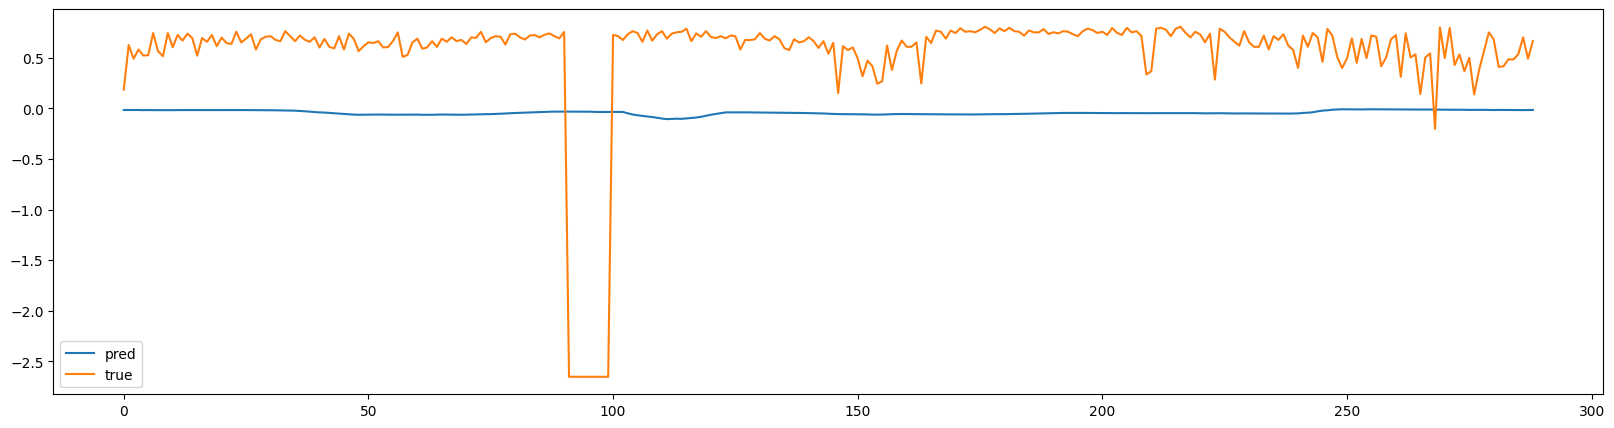

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.lineplot(data=preds, label="pred")
sns.lineplot(data=labs, label="true")